Imports

In [2]:
%matplotlib inline
from actincme.bin.symmetricize import Symmetricize
from actincme.bin.rotate import Rotate, AverageRotate
from actincme.bin.filament import Filament
from actincme.bin.mypyntcloud import MyPyntCloud
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

Get all files

In [3]:
# manually determined slices
start_list = [1, 4, 4, 4, 5, 6, 5, 6, 5, 6, 2, 4, 5, 3, 6, 7, 1, 4, 1, 2, 1, 5, 1, 1, 1, 0, 1]
end_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, -1, -1, -3, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1]
membrane_path = '../actincme/pkl_files/'

Average the shape

In [25]:
AvgRot = AverageRotate(membrane_path, start_list, end_list)
# setting cutoff_value = 1 averages all curves, cutoff_value = 10 averages curves that have atleast 10 elements
AveragedShape = AvgRot.rotate_many_curves(cutoff_value=10)

Mean of empty slice
Mean of empty slice
Mean of empty slice


can plot if necessary to see just this average shape, but the next block plots both this shape and filaments

In [26]:
# fig = plt.figure(figsize=[16,8])
# ax=fig.add_subplot(111, projection='3d')
# AvgRot.plot_averaged_curve(ax, xlims=False, save=True)

Plot filament orientation relative to this averaged shape

invalid value encountered in true_divide
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in arcsin
invalid value encountered in arcsin
invalid value encountered in arcsin


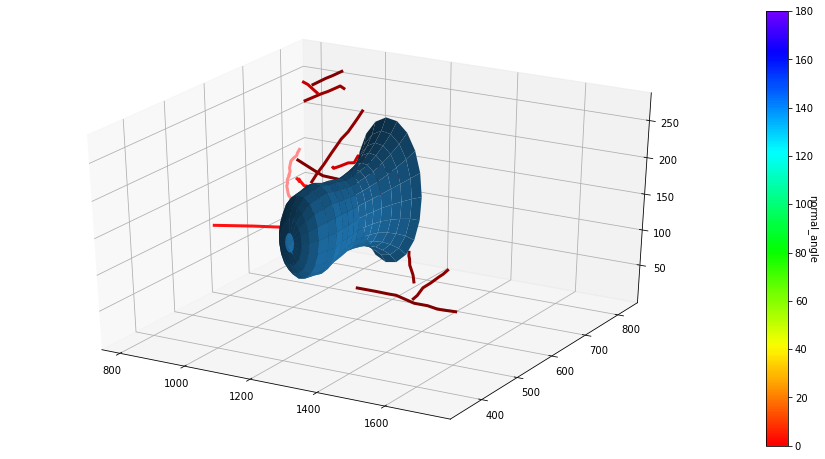

In [27]:
fig = plt.figure(figsize=[16,8])
ax=fig.add_subplot(111, projection='3d')

filaments = Filament('../Notebooks/', 'BranchedActinCoordinates_Integers')
# Compute directionality of filaments
filaments.calculate_directionality(rotated_surface=AveragedShape) #handles all the logic 
# Plot the filaments
filaments.plot_filaments_and_shape(1, fig, ax, AveragedShape, direction='normal_angle')

In [9]:
filaments._filament_orientation_dataframe

,filament_ID,ydir,zdir,normal_angle,length,x_coords,y_coords,z_coords
0,1,30.403742,12.804269,73.724799,302.317714,"[1239, 1220, 1191, 1172, 1138, 1123, 1103, 108...","[581, 598, 624, 640, 667, 679, 692, 700, 713, ...","[224, 217, 210, 205, 199, 196, 193, 180, 174, ..."
1,2,NaN,NaN,NaN,0.000000,[1128],[685],[192]
2,3,70.618245,30.825513,101.335745,85.866175,"[1128, 1143, 1148, 1158]","[685, 721, 740, 766]","[192, 172, 162, 148]"
3,4,81.253838,NaN,90.040050,26.305893,"[1223, 1231, 1234, 1233]","[607, 622, 629, 633]","[208, 191, 183, 166]"
4,5,50.220991,20.521085,155.170756,74.168727,"[926, 965, 974]","[690, 739, 747]","[139, 114, 113]"
5,6,35.371426,9.938077,68.703923,278.125871,"[1121, 1086, 1053, 1027, 1006, 958, 944, 927, ...","[548, 577, 599, 620, 631, 662, 671, 686, 704, ...","[189, 177, 169, 164, 160, 155, 151, 149, 142, ..."
6,7,29.932831,18.971385,171.842346,132.268666,"[844, 873, 892, 917, 959]","[755, 772, 781, 798, 821]","[152, 136, 127, 120, 109]"
7,8,-42.443417,-2.985278,19.915570,460.835112,"[810, 830, 840, 855, 870, 886, 905, 922, 936, ...","[789, 766, 756, 735, 714, 696, 681, 663, 652, ...","[156, 158, 158, 161, 163, 159, 159, 160, 163, ..."
8,9,81.431486,2.491170,116.494028,92.027170,"[1019, 1022, 1026, 1031, 1033]","[626, 665, 681, 709, 717]","[277, 277, 277, 278, 273]"
9,10,20.545153,-2.234755,60.339441,76.935038,"[1012, 992, 961, 940]","[664, 672, 684, 691]","[278, 279, 281, 281]"


Plot mesh 

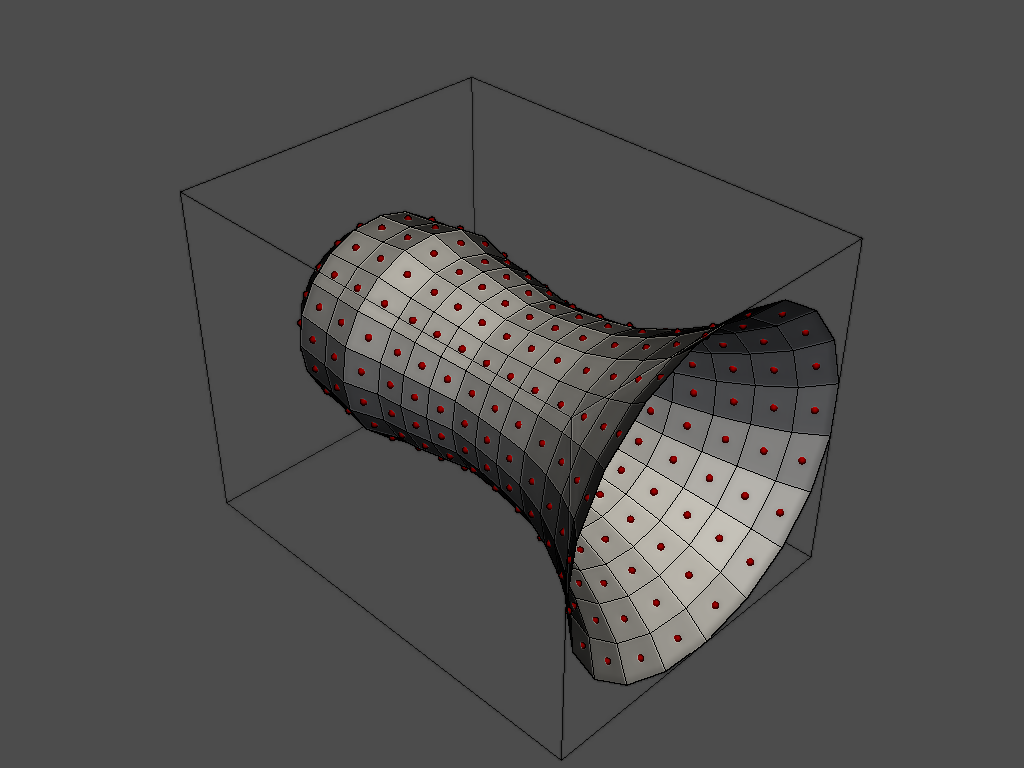

In [28]:
dim_x = AveragedShape._x3d_norm
dim_y = AveragedShape._y3d_norm
dim_z = AveragedShape._z3d_norm
grid = pv.StructuredGrid(dim_x, dim_y, dim_z)

centers = grid.cell_centers()
cpos = [(11.915126303095157, 6.11392754955802, 3.6124956735471914),
        (0.0, 0.375, 2.0),
        (-0.42546442225230097, 0.9024244135964158, -0.06789847673314177)]
p = pv.Plotter()
p.add_mesh(grid, show_edges=True,color=True, line_width=1)
p.enable_eye_dome_lighting()
p.add_bounding_box()
# p.camera_position = cpos
p.add_mesh(centers, color="r", point_size=8.0, render_points_as_spheres=True)
# p.add_floor('-x')
# p.add_floor('-z')
p.show(screenshot='test.png')

Plot orbitting version of above plot

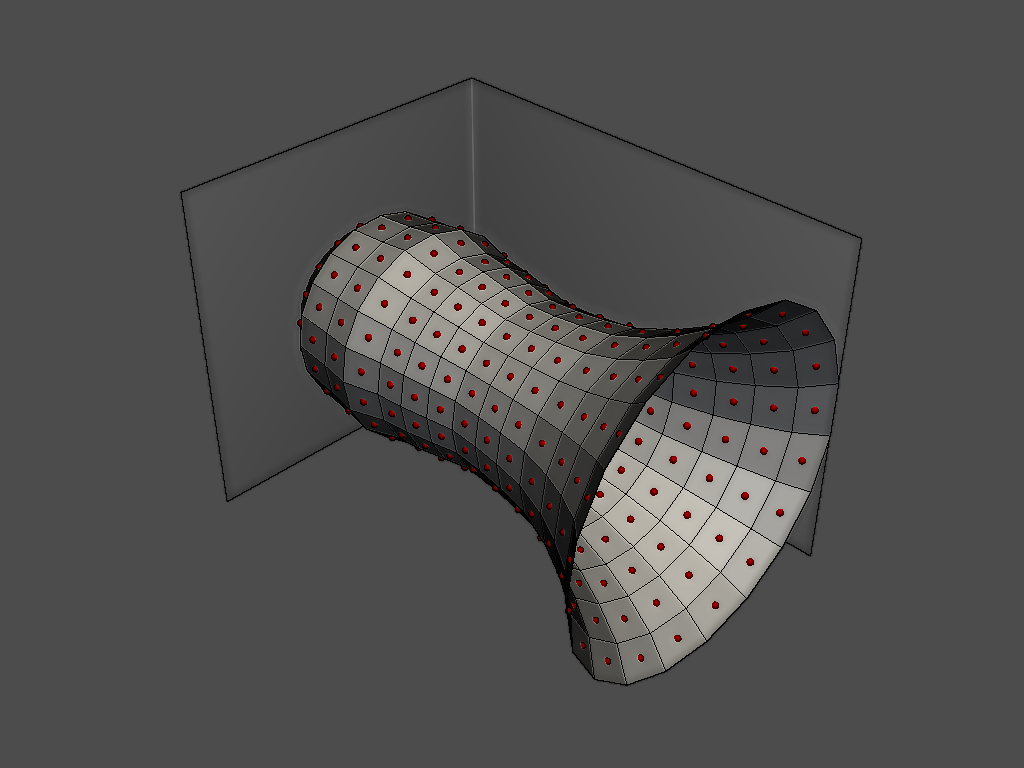

In [29]:
p = pv.Plotter()
viewup = [0, 1, 0]
p.add_mesh(grid, show_edges=True,color=True, line_width=1)
p.enable_eye_dome_lighting()
p.add_axes()
# p.camera_position = cpos
p.add_mesh(centers, color="r", point_size=8.0, render_points_as_spheres=True)
p.add_floor('-x')
p.add_floor('-y')
p.show(auto_close=False)
path = p.generate_orbital_path(n_points=36, shift=grid.length, viewup=viewup)
p.open_gif("orbit.gif")
p.orbit_on_path(path, write_frames=True)
p.close()

Plot mesh curvature

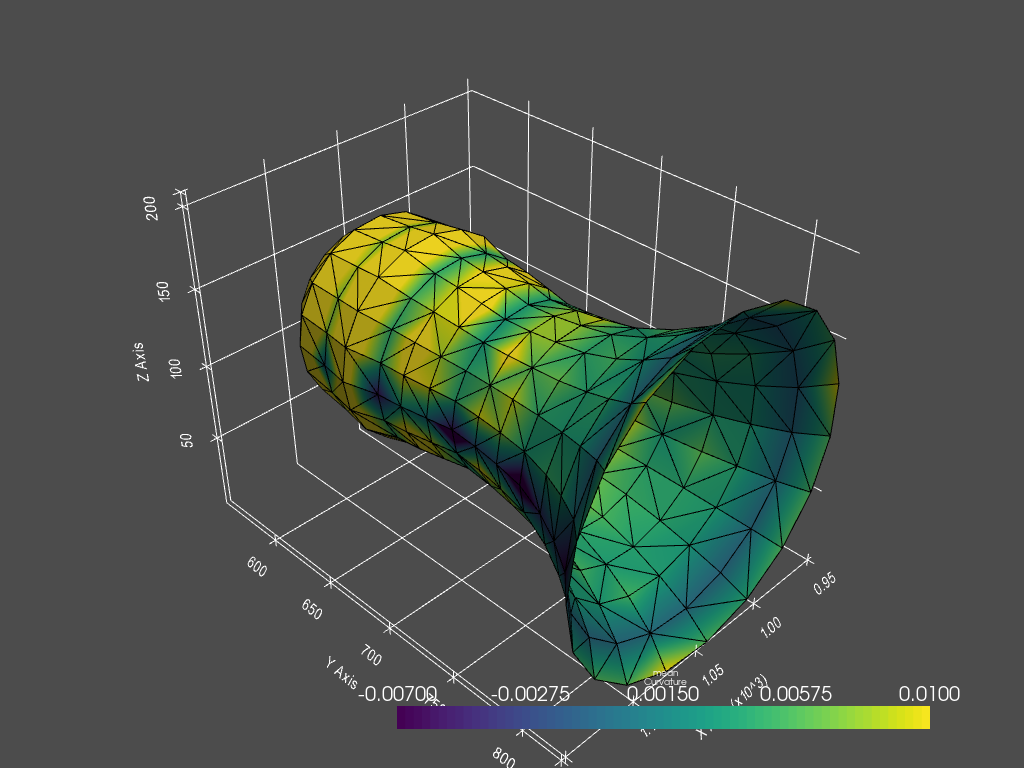

In [35]:
grid.plot_curvature(clim=[-0.007, 0.01], show_edges=True, show_grid=True)

This is what the plot looks like with Pyntcloud

In [22]:
pyntobj = MyPyntCloud(dim_x, dim_y, dim_z)
pyntobj.make_cloud_object()
pyntobj.compute_scalars(num_of_neighbours=3)

PyntCloud
400 points with 7 scalar fields
0 faces in mesh
1 kdtrees
0 voxelgrids
Centroid: 1050.7594502766153, 655.5783425172372, 105.51646776569378
Other attributes:

Can try plotting curvatures and normals, looks awful tho

In [19]:
fig = plt.figure(figsize=[10,8])
ax=fig.add_subplot(111, projection='3d')
pyntobj.plot_curve(fig, ax, save=True, label='curvature(4)')

In [ ]:
fig = plt.figure(figsize=[10,8])
ax=fig.add_subplot(111, projection='3d')
pyntobj.plot_curve(fig, ax, save=True, name_of_file='normal', label='ny(4)')